<h1 style="color:lightblue;">Statistics & Probability</h1>


**This jupyter notebook is devided into different sections.**

**Sections are devided by a <span style="color:red;">red dotted</span> line.**

<hr style="border-top: 3px dotted red; border-bottom: none;">

<h3 style="color:lightblue;">Imports</h3>

This section is importing all the libraries and modules that are needed for the Notebook to work.

<hr style="border-top: 3px dotted red; border-bottom: none;">

<h3 style="color:lightblue;">Variables & Data</h3>

This section is defining variables that can be used for different computations.

<hr style="border-top: 3px dotted red; border-bottom: none;">

<h3 style="color:lightblue;">Basic Functions</h3>

This section has basic functions that can be executed on the data.

<hr style="border-top: 3px dotted red; border-bottom: none;">

<h3 style="color:lightblue;">Advanced Functions</h3>

This section holds advanced statistics functions that can be executed on the data.

Advanced functions are devided by a <span style="color:green;">green dotted</span> line.


<hr style="border-top: 3px dotted red; border-bottom: none;">

<h3 style="color:lightblue;">Class Exercises</h3>

This section holds class exercises.

Class exercises are devided by a <span style="color:green;">green dotted</span> line.


<hr style="border-top: 15px dotted red; border-bottom: none;">

<h1 style="color:lightblue;">Imports</h1>

Imports need to be made when starting the notebook.

In [1]:
import os
import pyreadr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import rpy2.robjects as ro
import rpy2.robjects.packages as rpackages
from rpy2.robjects import pandas2ri

# 

<hr style="border-top: 15px dotted red; border-bottom: none;">

<h1 style="color:lightblue;">Variables & Data</h1>

### Change to Data Directory
This is needed to import directly from path!

In [2]:
os.chdir('/Users/mstring/GitHub/FHNW-2023/Statistics/data')
!ls -l


total 96
-rw-r--r--@ 1 mstring  staff  17829 Oct 13 15:47 SimpleReg.RData
-rw-r--r--@ 1 mstring  staff  23881 Oct 13 15:48 housingprices.txt
-rw-r--r--@ 1 mstring  staff   3212 Oct 20 08:41 ticketprices.txt


---

### Import R Data

- rdata
- dfr

In [67]:
# Importing R Data:
rdata = pyreadr.read_r('SimpleReg.RData')
print(rdata.keys())

odict_keys(['dat'])


In [68]:
# Converting R Data to a Dataframe:
dfr = (rdata['dat'])
print(dfr)

      TENANT RENT  HOUSEHOLD_INCOME
0      owner  NaN      15700.280447
1     tenant  450       8724.000000
2     tenant  383      46234.738788
3      owner  NaN       9602.000000
4      owner  NaN      13204.668742
...      ...  ...               ...
2255   owner  NaN      31281.600000
2256   owner  NaN      33799.347338
2257   owner  NaN      15500.000000
2258   owner  NaN      57155.307740
2259   owner  NaN      67895.600000

[2260 rows x 3 columns]


---

### Read a Text File


- df

In [5]:
# Read a text file with tab as separator on Mac and Fedora: 
df = pd.read_csv('housingprices.txt',  sep='\t')
#df = pd.read_csv('ticketprices.txt',  sep='\t')

In [ ]:
# Visualize content of dataframe
print(df)

---

### Import AER Package

In [ ]:
# Import the AER package
AER = rpackages.importr('AER')

# Load the Grunfeld dataset
grunfeld_rdf = ro.r('data("Grunfeld", package = "AER"); Grunfeld')

# Convert the R dataframe to a pandas dataframe
pandas2ri.activate()
grunfeld_df = pandas2ri.rpy2py(grunfeld_rdf)

print(grunfeld_df)

# 

<hr style="border-top: 15px dotted red; border-bottom: none;">

<h1 style="color:lightblue;">Basic Functions</h1>

### Line Plot

In [ ]:
# data defined locally
years = [2006 + x for x in range(16)]
weight = [80, 83, 84, 85, 86, 82, 81, 79, 79, 83, 80, 82, 82, 
          83, 81, 80]


# print length
print(len(years))
print(len(weight))


# plt.plot shows a line graph - standart behaviour
plt.plot(years, weight, c='r', lw=3, linestyle='--')
plt.show()

---

### Bar Plot

In [ ]:
"""
Args:
    data is defined locally
Returns:
    basic bar plot
"""

x = ['C++', 'C#', 'Python', 'Java', 'Go']
y = [20, 50, 140, 1, 4]


plt.bar(x, y, color='blue', align='edge', width=0.5, edgecolor='green', linewidth=6)
plt.show()

---

### Scatter Plot 

In [ ]:
# SimpleReg.RData 
print(dfr)

In [ ]:
"""
Args:
    param1: dfr from housingprices.txt, format is a dataframe
Returns:
    scatter plot
"""

# Remove rows where 'RENT' is NaN
dfr = dfr.dropna(subset=['RENT'])  

plt.scatter(dfr['RENT'], dfr['HOUSEHOLD_INCOME'], c='red')
plt.xlabel('Rent')
plt.ylabel('Household Income')
plt.title('Scatter plot of Rent vs Household Income')
plt.show()

---

### Boxplot

In [ ]:
# Import SimpleReg.RData to df
print(df)

In [ ]:
# Create Boxplot
boxplot = df.boxplot(column = 'Price', by='Bedrooms')
boxplot.set_ylabel('Price')
boxplot.set_xlabel('Bedrooms')
plt.show()

---

# 

<hr style="border-top: 15px dotted red; border-bottom: none;">

<h1 style="color:lightblue;">Advanced Functions</h1>

# Linear Regression with SKLearn

## Level - Level

The equation for a simple linear regression model is:

$$y_i = b_0 + b_1 \cdot x_i + e_i$$

This can be compared to the equation of a line, which is:

$$y = m \cdot x + q$$

Here's how the terms correspond:

- $y_i$ is the dependent variable (like $y$ in the line equation).
- $b_0$ is the y-intercept (like $q$ in the line equation).
- $b_1$ is the slope of the line (like $m$ in the line equation).
- $x_i$ is the independent variable (like $x$ in the line equation).
- $e_i$ is the error term, which accounts for the difference between the observed and predicted values. This term doesn't have a direct equivalent in the simple line equation.

In a statistical context, $y_i = b_0 + b_1 \cdot x_i + e_i$ is a simple linear regression model, which predicts the dependent variable $y_i$ based on the independent variable $x_i$, with some error term $e_i$. The coefficients $b_0$ and $b_1$ are estimated from the data.


In [ ]:
# Import SimpleReg.RData to df
print(df)

In [ ]:
# Apply a filter if needed
df_filter = df[df['Bathrooms'] == 1.0]
print(df_filter)

In [92]:
# Handle missing or infinite values which might result from the conversion or the log transformation:
df_filter = df_filter.replace([np.inf, -np.inf], np.nan)
df_filter = df_filter.dropna(subset=['Age','Price'])

In [ ]:
# Independent Variable X (Provide)
x = df[['Bedrooms']]

# Dependent Variable Y (Predict)
y = df[['Price']]

# Find the mean linear regression of all the values
model = LinearRegression()
model.fit(x,y)

In [ ]:
# Plot the values and linear regression
plt.scatter(x,y)
plt.plot(x, model.predict(x), c='red')

In [ ]:
# Print y-intercept
# One dimensional array - specify which element before convert. to int
print('y-Intercept = ' + str(float(model.intercept_[0])))

# Print slope
# Two dimensional array - specify which element before convert. to int
print('Slope = ' + str(float(model.coef_[0][0])))

In [ ]:
# Predict certain value
def predicted_y(value):
    predict = model.coef_ * value + model.intercept_
    return predict

# Insert value into function
float(predicted_y(3)[0][0])

---

## Log - Level

The equation for a log-level regression model is:

$$\log(y_i) = b_0 + b_1 \cdot x_i + e_i$$

Here's how the terms correspond:

- $\log(y_i)$ is the natural logarithm of the dependent variable.
- $b_0$ is the y-intercept.
- $b_1$ is the slope of the line.
- $x_i$ is the independent variable.
- $e_i$ is the error term, which accounts for the difference between the observed and predicted values.

In this model, a one-unit change in $x_i$ is associated with a $b_1$ percent change in $y_i$. This is because when $y_i$ is logged, the coefficient $b_1$ can be interpreted as a percentage change rather than a unit change. The error term $e_i$ accounts for any random variation not explained by the model.

This model assumes that the relationship between $x_i$ and $\log(y_i)$ is linear. It's often used in situations where the effect of changes in the independent variable on the dependent variable are multiplicative rather than additive. The coefficients $b_0$ and $b_1$ are estimated from the data.

Please note that this interpretation assumes that all other assumptions of linear regression (such as independence of errors) are met. If these assumptions are violated, then this interpretation may not be valid.


In [ ]:
# Import SimpleReg.RData to df
print(df)

In [ ]:
# Apply a filter if needed
df_filter = df[df['Bathrooms'] == 1.0]
print(df_filter)

In [ ]:
# Handle missing or infinite values which might result from the conversion or the log transformation:
df_filter = df_filter.replace([np.inf, -np.inf], np.nan)
df_filter = df_filter.dropna(subset=['Age','Price'])

In [ ]:
# Independent Variable X (Provide)
x = df[['Bedrooms']]

# Dependent Variable Y (Predict)
# Apply a log transformation to the 'Price' column
y = np.log(df[['Price']])

# Create a LinearRegression object
model = LinearRegression()

# Fit the model
model.fit(x, y)

In [ ]:
# Plot the values and linear regression
plt.scatter(x,y)
plt.plot(x, model.predict(x), c='red')

In [ ]:
# Print y-intercept
# One dimensional array - specify which element before convert. to int
print('y-Intercept = ' + str(float(model.intercept_[0])))

# Print slope
# Two dimensional array - specify which element before convert. to int
print('Slope = ' + str(float(model.coef_[0][0])))

In [ ]:
# Predict certain value
def predicted_y(value):
    predict = model.coef_ * value + model.intercept_
    return predict

# Insert value into function
float(predicted_y(3)[0][0])

---

## Level - Log

The equation for a level-log regression model is:

$$y_i = b_0 + b_1 \cdot \log(x_i) + e_i$$

Here's how the terms correspond:

- $y_i$ is the dependent variable.
- $b_0$ is the y-intercept.
- $b_1$ is the slope of the line.
- $\log(x_i)$ is the natural logarithm of the independent variable.
- $e_i$ is the error term, which accounts for the difference between the observed and predicted values.

In this model, a one percent change in $x_i$ is associated with a change of $(0.01 \cdot b_1)$ units in $y_i$. This is because when $x_i$ is logged, the coefficient $b_1$ can be interpreted as a semi-elasticity. The error term $e_i$ accounts for any random variation not explained by the model.

This model assumes that the relationship between $\log(x_i)$ and $y_i$ is linear. It's often used in situations where the effect of changes in the independent variable on the dependent variable are multiplicative rather than additive. The coefficients $b_0$ and $b_1$ are estimated from the data.

Please note that this interpretation assumes that all other assumptions of linear regression (such as independence of errors) are met. If these assumptions are violated, then this interpretation may not be valid.

In [ ]:
# Import SimpleReg.RData to df
print(df)

In [ ]:
# Apply a filter if needed
df_filter = df[df['Bathrooms'] == 1.0]
print(df_filter)

In [97]:
# Handle missing or infinite values which might result from the conversion or the log transformation:
df_filter = df_filter.replace([np.inf, -np.inf], np.nan)
df_filter = df_filter.dropna(subset=['Age','Price'])

In [ ]:
# Independent Variable X (Provide)
# Apply a log transformation to the 'Bedrooms' column
x = np.log(df[['Bedrooms']])

# Dependent Variable Y (Predict)
y = df[['Price']]

# Create a LinearRegression object
model = LinearRegression()

# Fit the model
model.fit(x, y)

In [ ]:
# Plot the values and linear regression
plt.scatter(x,y)
plt.plot(x, model.predict(x), c='red')

In [ ]:
# Print y-intercept
# One dimensional array - specify which element before convert. to int
print('y-Intercept = ' + str(float(model.intercept_[0])))

# Print slope
# Two dimensional array - specify which element before convert. to int
print('Slope = ' + str(float(model.coef_[0][0])))

In [ ]:
# Predict certain value
def predicted_y(value):
    predict = model.coef_ * value + model.intercept_
    return predict

# Insert value into function
float(predicted_y(3)[0][0])

---

## Log - Log

The equation for a log-log regression model is:

$$\log(y_i) = b_0 + b_1 \cdot \log(x_i) + e_i$$

Here's how the terms correspond:

- $\log(y_i)$ is the natural logarithm of the dependent variable.
- $b_0$ is the y-intercept.
- $b_1$ is the slope of the line.
- $\log(x_i)$ is the natural logarithm of the independent variable.
- $e_i$ is the error term, which accounts for the difference between the observed and predicted values.

In this model, a one percent change in $x_i$ is associated with a $b_1$ percent change in $y_i$. This is because when both $y_i$ and $x_i$ are logged, the coefficient $b_1$ can be interpreted as an elasticity. The error term $e_i$ accounts for any random variation not explained by the model.

This model assumes that the relationship between $\log(x_i)$ and $\log(y_i)$ is linear. It's often used in situations where the effect of changes in the independent variable on the dependent variable are multiplicative rather than additive. The coefficients $b_0$ and $b_1$ are estimated from the data.

Please note that this interpretation assumes that all other assumptions of linear regression (such as independence of errors) are met. If these assumptions are violated, then this interpretation may not be valid.

In [ ]:
# Import SimpleReg.RData to df
print(df)

In [ ]:
# Apply a filter if needed
df_filter = df[df['Bathrooms'] == 1.0]
print(df_filter)

In [ ]:
# Handle missing or infinite values which might result from the conversion or the log transformation:
df_filter = df_filter.replace([np.inf, -np.inf], np.nan)
df_filter = df_filter.dropna(subset=['Age','Price'])

In [ ]:
# Independent Variable X (Provide)
# Apply a log transformation to the 'Bedrooms' column
x = np.log(df[['Bedrooms']])

# Dependent Variable Y (Predict)
# Apply a log transformation to the 'Price' column
y = np.log(df[['Price']])

# Create a LinearRegression object
model = LinearRegression()

# Fit the model
model.fit(x, y)

In [ ]:
# Plot the values and linear regression
plt.scatter(x,y)
plt.plot(x, model.predict(x), c='red')

In [ ]:
# Print y-intercept
# One dimensional array - specify which element before convert. to int
print('y-Intercept = ' + str(float(model.intercept_[0])))

# Print slope
# Two dimensional array - specify which element before convert. to int
print('Slope = ' + str(float(model.coef_[0][0])))

In [ ]:
# Predict certain value
def predicted_y(value):
    predict = model.coef_ * value + model.intercept_
    return predict

# Insert value into function
float(predicted_y(3)[0][0])

# 

<hr style="border-top: 15px dotted green; border-bottom: none;">

## Multiple Regression Model

In [ ]:
# Visualize content of dataframe
print(df)

#### Define Variables

In [11]:
# Variable 1 (Provide)
a = df[['Date']] 

# Variable 2 (Provide)
b = df[['Receipts']]

# Variable 3 (Provide)
c = df[['Paid Attendance']]

# Variable 4 (Provide)
d = df[['Shows']]

# Variable 5 (Provide)
e = df[['Avg Ticket Price']]

# Variable 6 (Provide)
#f = df[['']]

# Variable 7 (Provide)
#g = df[['']]

# Variable 8 (Provide)
#h = df[['']]

In [ ]:
# Define dependent variable
Y = df['Paid Attendance']

# Define independent variables
X = df[['Date', 'Receipts', 'Shows', 'Avg Ticket Price']]

# Create a Linear Regression object
lm = LinearRegression()

# Fit the model to the data
lm.fit(X, Y)

# Print out the coefficients
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

# 

<hr style="border-top: 15px dotted red; border-bottom: none;">

<h1 style="color:lightblue;">Class Exercises</h1>

## Class Exercise Law of Lagre Numbers

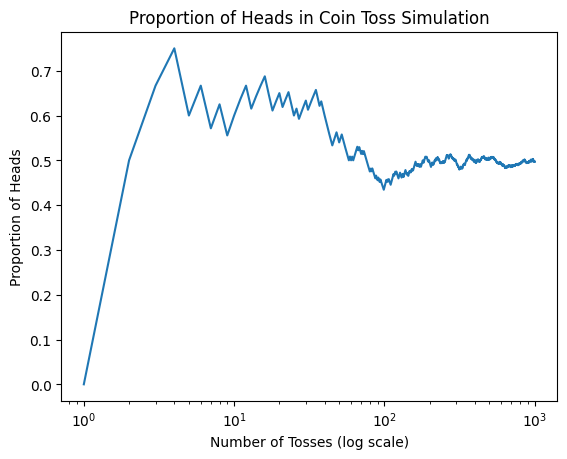

In [18]:
# Show the approximation to 0.5 with a large number of tosses
# Empirical Probability
# Number of tosses
n_tosses = 1000

# Simulate coin tosses (0 = tails, 1 = heads)
tosses = np.random.randint(0, 2, size=n_tosses)

# Calculate cumulative sum of heads
cumulative_heads = np.cumsum(tosses)

# Calculate proportion of heads
proportion_heads = cumulative_heads / np.arange(1, n_tosses + 1)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the proportion of heads
ax.semilogx(np.arange(1, n_tosses + 1), proportion_heads)

# Set labels and title
ax.set_xlabel('Number of Tosses (log scale)')
ax.set_ylabel('Proportion of Heads')
ax.set_title('Proportion of Heads in Coin Toss Simulation')

# Show the plot
plt.show()


# 

<hr style="border-top: 15px dotted green; border-bottom: none;">

## Log - Log - Excercise 3&4 - nr1

The equation for a log-log regression model is:

$$\log(y_i) = b_0 + b_1 \cdot \log(x_i) + e_i$$

Here's how the terms correspond:

- $\log(y_i)$ is the natural logarithm of the dependent variable.
- $b_0$ is the y-intercept.
- $b_1$ is the slope of the line.
- $\log(x_i)$ is the natural logarithm of the independent variable.
- $e_i$ is the error term, which accounts for the difference between the observed and predicted values.

In this model, a one percent change in $x_i$ is associated with a $b_1$ percent change in $y_i$. This is because when both $y_i$ and $x_i$ are logged, the coefficient $b_1$ can be interpreted as an elasticity. The error term $e_i$ accounts for any random variation not explained by the model.

This model assumes that the relationship between $\log(x_i)$ and $\log(y_i)$ is linear. It's often used in situations where the effect of changes in the independent variable on the dependent variable are multiplicative rather than additive. The coefficients $b_0$ and $b_1$ are estimated from the data.

Please note that this interpretation assumes that all other assumptions of linear regression (such as independence of errors) are met. If these assumptions are violated, then this interpretation may not be valid.

In [ ]:
# Filter the data to include only tenants
dfr_filter = dfr[dfr['TENANT'] == 'tenant']
print(dfr_filter)

In [73]:
# Handle missing or infinite values which might result from the conversion or the log transformation:
dfr_filter = dfr_filter.replace([np.inf, -np.inf], np.nan)
dfr_filter = dfr_filter.dropna(subset=['RENT','HOUSEHOLD_INCOME'])

In [ ]:
print(dfr_filter[['HOUSEHOLD_INCOME']])

In [ ]:
print(dfr_filter['RENT'])

In [76]:
# Independent Variable X (Provide)
# Apply a log transformation to the 'Bedrooms' column
x = np.log(dfr_filter[['HOUSEHOLD_INCOME']])

In [77]:
# Dependent Variable Y (Predict)
# Apply a log transformation to the 'Price' column
y = np.log(dfr_filter[['RENT']])

In [78]:
# Create a LinearRegression object
model = LinearRegression()

# Fit the model
model.fit(x, y)

LinearRegression()

In [ ]:
# Plot the values and linear regression
plt.scatter(x,y)
plt.plot(x, model.predict(x), c='red')

In [83]:
# Print y-intercept
# One dimensional array - specify which element before convert. to int
print('y-Intercept = ' + str(float(model.intercept_[0])))

# Print slope
# Two dimensional array - specify which element before convert. to int
print('Slope = ' + str(float(model.coef_[0][0])))

y-Intercept = 3.7811401542901386
Slope = 0.19829142767806807


In [81]:
# Predict certain value
def predicted_y(value):
    predict = model.coef_ * value + model.intercept_
    return predict

# Insert value into function
int(predicted_y(3)[0][0])

4

# 

<hr style="border-top: 15px dotted green; border-bottom: none;">

## Exercise Template

# 

<hr style="border-top: 15px dotted green; border-bottom: none;">